## Importing Necessary Libraries

In [10]:
import pandas as pd
import texthero as th
from nltk.corpus import stopwords
import nltk
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

## Importing the ThunderBird Dataset

In [11]:
df = pd.read_csv('bugs-2023-02-11 thunderbird.csv')
df.head()

,Bug ID,Type,Priority,Assignee,Severity,Status,Opened,Closed,Resolution,Summary,Opened_Date,Closed_Date,Days_Taken
0,35689,defect,P3,jporterbugs,minor,RESOLVED,12-04-2000 17:25,17-09-2009 23:34,FIXED,Newsgroup postings don't linkify newsgroup hea...,12-04-2000,17-09-2009,3445
1,36489,enhancement,--,neil,normal,RESOLVED,20-04-2000 01:50,24-03-2015 17:00,FIXED,"Combined To/From column in thread pane (aka ""C...",20-04-2000,24-03-2015,5451
2,58140,enhancement,--,mkmelin+mozilla,normal,RESOLVED,26-10-2000 15:57,29-11-2009 19:32,FIXED,save multiple messages as individual files in ...,26-10-2000,29-11-2009,3321
3,67219,defect,--,mkmelin+mozilla,trivial,RESOLVED,31-01-2001 13:03,01-08-2009 09:28,FIXED,Disable filters menu item when no accounts are...,31-01-2001,01-08-2009,3104
4,68784,enhancement,--,acelists,normal,RESOLVED,14-02-2001 01:22,16-04-2013 02:06,FIXED,"when sending mail, should first check ""no reci...",14-02-2001,16-04-2013,4444


## Dropping the Un-necessary Columns

In [12]:
df = df.drop(['Opened'], axis = 1)
df = df.drop(['Closed'], axis = 1)
df = df.drop(['Priority'], axis = 1)
df.head()

,Bug ID,Type,Assignee,Severity,Status,Resolution,Summary,Opened_Date,Closed_Date,Days_Taken
0,35689,defect,jporterbugs,minor,RESOLVED,FIXED,Newsgroup postings don't linkify newsgroup hea...,12-04-2000,17-09-2009,3445
1,36489,enhancement,neil,normal,RESOLVED,FIXED,"Combined To/From column in thread pane (aka ""C...",20-04-2000,24-03-2015,5451
2,58140,enhancement,mkmelin+mozilla,normal,RESOLVED,FIXED,save multiple messages as individual files in ...,26-10-2000,29-11-2009,3321
3,67219,defect,mkmelin+mozilla,trivial,RESOLVED,FIXED,Disable filters menu item when no accounts are...,31-01-2001,01-08-2009,3104
4,68784,enhancement,acelists,normal,RESOLVED,FIXED,"when sending mail, should first check ""no reci...",14-02-2001,16-04-2013,4444


## Getting the information of the Dataset

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Bug ID       10000 non-null  int64 
 1   Type         10000 non-null  object
 2   Assignee     10000 non-null  object
 3   Severity     9978 non-null   object
 4   Status       10000 non-null  object
 5   Resolution   10000 non-null  object
 6   Summary      10000 non-null  object
 7   Opened_Date  10000 non-null  object
 8   Closed_Date  10000 non-null  object
 9   Days_Taken   10000 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 781.4+ KB


## Applying Preprocessing Techniques on Summary Column

In [14]:
df['Summary']

0       Newsgroup postings don't linkify newsgroup hea...
1       Combined To/From column in thread pane (aka "C...
2       save multiple messages as individual files in ...
3       Disable filters menu item when no accounts are...
4       when sending mail, should first check "no reci...
                              ...                        
9995    When two or more messages are selected/highlig...
9996    cloudfile.onFileUpload contains wrong fileName...
9997    remove incoming mail default text encoding option
9998                  Remove preprocessing in panelUI.css
9999    this._addressBooks could be used while undefin...
Name: Summary, Length: 10000, dtype: object

### 1. Tokenization

In [15]:
def tokenize(column):

    tokens = nltk.word_tokenize(column)
    return [w for w in tokens if w.isalpha()]    

In [16]:
df['Tokenized'] = df.apply(lambda x: tokenize(x['Summary']), axis=1)
df

,Bug ID,Type,Assignee,Severity,Status,Resolution,Summary,Opened_Date,Closed_Date,Days_Taken,Tokenized
0,35689,defect,jporterbugs,minor,RESOLVED,FIXED,Newsgroup postings don't linkify newsgroup hea...,12-04-2000,17-09-2009,3445,"[Newsgroup, postings, do, linkify, newsgroup, ..."
1,36489,enhancement,neil,normal,RESOLVED,FIXED,"Combined To/From column in thread pane (aka ""C...",20-04-2000,24-03-2015,5451,"[Combined, column, in, thread, pane, aka, Corr..."
2,58140,enhancement,mkmelin+mozilla,normal,RESOLVED,FIXED,save multiple messages as individual files in ...,26-10-2000,29-11-2009,3321,"[save, multiple, messages, as, individual, fil..."
3,67219,defect,mkmelin+mozilla,trivial,RESOLVED,FIXED,Disable filters menu item when no accounts are...,31-01-2001,01-08-2009,3104,"[Disable, filters, menu, item, when, no, accou..."
4,68784,enhancement,acelists,normal,RESOLVED,FIXED,"when sending mail, should first check ""no reci...",14-02-2001,16-04-2013,4444,"[when, sending, mail, should, first, check, no..."
...,...,...,...,...,...,...,...,...,...,...,...
9995,1671800,defect,richard.marti,--,RESOLVED,FIXED,When two or more messages are selected/highlig...,17-10-2020,21-10-2020,4,"[When, two, or, more, messages, are, in, the, ..."
9996,1671835,defect,je,--,RESOLVED,FIXED,cloudfile.onFileUpload contains wrong fileName...,18-10-2020,08-06-2021,233,"[contains, wrong, fileName, if, attachment, wa..."
9997,1671880,task,remotenonsense,--,RESOLVED,FIXED,remove incoming mail default text encoding option,19-10-2020,19-11-2020,31,"[remove, incoming, mail, default, text, encodi..."
9998,1671974,task,richard.marti,--,RESOLVED,FIXED,Remove preprocessing in panelUI.css,19-10-2020,19-10-2020,0,"[Remove, preprocessing, in]"


### 2. Converting the Summary into Lowercase

In [17]:
df['String_Tokenized'] = [' '.join(map(str, l)) for l in df['Tokenized']]
df['String_Tokenized'] = df['String_Tokenized'].apply(str.lower)
df['String_Tokenized']

0       newsgroup postings do linkify newsgroup header...
1       combined column in thread pane aka corresponde...
2       save multiple messages as individual files in ...
3       disable filters menu item when no accounts are...
4       when sending mail should first check no recipi...
                              ...                        
9995    when two or more messages are in the message p...
9996    contains wrong filename if attachment was rena...
9997    remove incoming mail default text encoding option
9998                              remove preprocessing in
9999                     could be used while undefined in
Name: String_Tokenized, Length: 10000, dtype: object

### 3. Removing the Stopwords from the Summary

In [18]:
stop_words = stopwords.words('english')
df['String_Tokenized'] = df['String_Tokenized'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df['String_Tokenized']

0        newsgroup postings linkify newsgroup header like
1       combined column thread pane aka correspondents...
2       save multiple messages individual files directory
3                  disable filters menu item accounts set
4       sending mail first check recipient subject cur...
                              ...                        
9995    two messages message pane one messages highlig...
9996    contains wrong filename attachment renamed for...
9997    remove incoming mail default text encoding option
9998                                 remove preprocessing
9999                                 could used undefined
Name: String_Tokenized, Length: 10000, dtype: object

### 4. Removing the Punctuations

In [19]:
df["Summary_wo_Punctuation"] = df['String_Tokenized'].str.replace('[^\w\s]','')
df.head()

,Bug ID,Type,Assignee,Severity,Status,Resolution,Summary,Opened_Date,Closed_Date,Days_Taken,Tokenized,String_Tokenized,Summary_wo_Punctuation
0,35689,defect,jporterbugs,minor,RESOLVED,FIXED,Newsgroup postings don't linkify newsgroup hea...,12-04-2000,17-09-2009,3445,"[Newsgroup, postings, do, linkify, newsgroup, ...",newsgroup postings linkify newsgroup header like,newsgroup postings linkify newsgroup header like
1,36489,enhancement,neil,normal,RESOLVED,FIXED,"Combined To/From column in thread pane (aka ""C...",20-04-2000,24-03-2015,5451,"[Combined, column, in, thread, pane, aka, Corr...",combined column thread pane aka correspondents...,combined column thread pane aka correspondents...
2,58140,enhancement,mkmelin+mozilla,normal,RESOLVED,FIXED,save multiple messages as individual files in ...,26-10-2000,29-11-2009,3321,"[save, multiple, messages, as, individual, fil...",save multiple messages individual files directory,save multiple messages individual files directory
3,67219,defect,mkmelin+mozilla,trivial,RESOLVED,FIXED,Disable filters menu item when no accounts are...,31-01-2001,01-08-2009,3104,"[Disable, filters, menu, item, when, no, accou...",disable filters menu item accounts set,disable filters menu item accounts set
4,68784,enhancement,acelists,normal,RESOLVED,FIXED,"when sending mail, should first check ""no reci...",14-02-2001,16-04-2013,4444,"[when, sending, mail, should, first, check, no...",sending mail first check recipient subject cur...,sending mail first check recipient subject cur...


### 5. Removing ' " ' with blank space ' '

In [20]:
df['Summary_wo_Punctuation'] = df['Summary_wo_Punctuation'].apply(lambda x: x.replace('"', ''))
df['Summary_wo_Punctuation']

0        newsgroup postings linkify newsgroup header like
1       combined column thread pane aka correspondents...
2       save multiple messages individual files directory
3                  disable filters menu item accounts set
4       sending mail first check recipient subject cur...
                              ...                        
9995    two messages message pane one messages highlig...
9996    contains wrong filename attachment renamed for...
9997    remove incoming mail default text encoding option
9998                                 remove preprocessing
9999                                 could used undefined
Name: Summary_wo_Punctuation, Length: 10000, dtype: object

### 6. Stemming the Summary Column

In [21]:
# Use English stemmer.
stemmer = SnowballStemmer("english")
df['Summary_wo_Punctuation'] = df['Summary_wo_Punctuation'].str.split()
df['Stemmed'] = df['Summary_wo_Punctuation'].apply(lambda x: [stemmer.stem(y) for y in x]) 

### 7. Converting the Stemmed column into string type

In [22]:
df['ListString'] = [' '.join(map(str, l)) for l in df['Stemmed']]
df

,Bug ID,Type,Assignee,Severity,Status,Resolution,Summary,Opened_Date,Closed_Date,Days_Taken,Tokenized,String_Tokenized,Summary_wo_Punctuation,Stemmed,ListString
0,35689,defect,jporterbugs,minor,RESOLVED,FIXED,Newsgroup postings don't linkify newsgroup hea...,12-04-2000,17-09-2009,3445,"[Newsgroup, postings, do, linkify, newsgroup, ...",newsgroup postings linkify newsgroup header like,"[newsgroup, postings, linkify, newsgroup, head...","[newsgroup, post, linkifi, newsgroup, header, ...",newsgroup post linkifi newsgroup header like
1,36489,enhancement,neil,normal,RESOLVED,FIXED,"Combined To/From column in thread pane (aka ""C...",20-04-2000,24-03-2015,5451,"[Combined, column, in, thread, pane, aka, Corr...",combined column thread pane aka correspondents...,"[combined, column, thread, pane, aka, correspo...","[combin, column, thread, pane, aka, correspond...",combin column thread pane aka correspond column
2,58140,enhancement,mkmelin+mozilla,normal,RESOLVED,FIXED,save multiple messages as individual files in ...,26-10-2000,29-11-2009,3321,"[save, multiple, messages, as, individual, fil...",save multiple messages individual files directory,"[save, multiple, messages, individual, files, ...","[save, multipl, messag, individu, file, direct...",save multipl messag individu file directori
3,67219,defect,mkmelin+mozilla,trivial,RESOLVED,FIXED,Disable filters menu item when no accounts are...,31-01-2001,01-08-2009,3104,"[Disable, filters, menu, item, when, no, accou...",disable filters menu item accounts set,"[disable, filters, menu, item, accounts, set]","[disabl, filter, menu, item, account, set]",disabl filter menu item account set
4,68784,enhancement,acelists,normal,RESOLVED,FIXED,"when sending mail, should first check ""no reci...",14-02-2001,16-04-2013,4444,"[when, sending, mail, should, first, check, no...",sending mail first check recipient subject cur...,"[sending, mail, first, check, recipient, subje...","[send, mail, first, check, recipi, subject, cu...",send mail first check recipi subject current w...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1671800,defect,richard.marti,--,RESOLVED,FIXED,When two or more messages are selected/highlig...,17-10-2020,21-10-2020,4,"[When, two, or, more, messages, are, in, the, ...",two messages message pane one messages highlig...,"[two, messages, message, pane, one, messages, ...","[two, messag, messag, pane, one, messag, highl...",two messag messag pane one messag highlight go...
9996,1671835,defect,je,--,RESOLVED,FIXED,cloudfile.onFileUpload contains wrong fileName...,18-10-2020,08-06-2021,233,"[contains, wrong, fileName, if, attachment, wa...",contains wrong filename attachment renamed for...,"[contains, wrong, filename, attachment, rename...","[contain, wrong, filenam, attach, renam, forward]",contain wrong filenam attach renam forward
9997,1671880,task,remotenonsense,--,RESOLVED,FIXED,remove incoming mail default text encoding option,19-10-2020,19-11-2020,31,"[remove, incoming, mail, default, text, encodi...",remove incoming mail default text encoding option,"[remove, incoming, mail, default, text, encodi...","[remov, incom, mail, default, text, encod, opt...",remov incom mail default text encod option
9998,1671974,task,richard.marti,--,RESOLVED,FIXED,Remove preprocessing in panelUI.css,19-10-2020,19-10-2020,0,"[Remove, preprocessing, in]",remove preprocessing,"[remove, preprocessing]","[remov, preprocess]",remov preprocess


### 8. Applying TF-IDF using SkLearn

In [23]:
data = []
for i in df['ListString']:
    review = ''.join(i) 
    data.append(review)
print(data)


['newsgroup post linkifi newsgroup header like', 'combin column thread pane aka correspond column', 'save multipl messag individu file directori', 'disabl filter menu item account set', 'send mail first check recipi subject current way round', 'compact purg button', 'flag messag gray standalon messag window', 'indic root folder new mail subfold', 'card preview pane content ca select copi clipboard', 'open folder show folder name', 'news messag read center list pane', 'crash open address book edit file nsaddrdatabas', 'composit need abil manipul multipl recipi simultan multipl select email address contact delet copi toggl etc', 'remov code mailnew', 'return receipt process messag load', 'allow smtp server specifi creat new account', 'drag drop file mailbox folder', 'sometim delet messag focus get lost instead go next messag', 'abil messag text file folder', 'type letter box trigger menu select', 'need set default mailto protocol handler default mail app', 'remot imag alway load regardle

In [24]:
tfidf = TfidfVectorizer()
 
# get tf-df values
result = tfidf.fit_transform(data)

In [25]:
print('\nidf values:')
for ele1, ele2 in zip(tfidf.get_feature_names_out(), tfidf.idf_):
    print(ele1, ':', ele2)


idf values:
ab : 7.032386536628571
abbrevi : 9.517293186416572
abc : 9.517293186416572
abchang : 9.517293186416572
abchangedmonitor : 9.517293186416572
abdirtreeoverlay : 9.517293186416572
abi : 9.517293186416572
abil : 7.502390165874306
abl : 7.3200686090803515
abort : 9.517293186416572
aboutdevtool : 9.517293186416572
aboutdialog : 8.601002454542416
aboutsupport : 9.517293186416572
abpaneloncomposerreopen : 9.517293186416572
abresultstre : 9.517293186416572
abselectaddressesdialog : 9.517293186416572
absent : 9.517293186416572
absolut : 8.824146005856626
acc : 9.517293186416572
acceler : 7.812545094178145
accent : 7.90785527398247
accentcolor : 8.824146005856626
accept : 8.264530217921202
access : 5.556480016818993
accessiblecaret : 9.517293186416572
accesskey : 6.6840798423603545
accid : 9.517293186416572
accident : 8.601002454542416
accnam : 9.517293186416572
accont : 9.517293186416572
accord : 8.264530217921202
account : 4.229026155722035
accountcentr : 9.111828078308406
accountc

In [26]:
print('\nWord indexes:')
print(tfidf.vocabulary_)


Word indexes:
{'newsgroup': 2387, 'post': 2934, 'linkifi': 1988, 'header': 1597, 'like': 1979, 'combin': 639, 'column': 637, 'thread': 3865, 'pane': 2800, 'aka': 102, 'correspond': 746, 'save': 3347, 'multipl': 2338, 'messag': 2165, 'individu': 1743, 'file': 1284, 'directori': 940, 'disabl': 943, 'filter': 1298, 'menu': 2153, 'item': 1839, 'account': 31, 'set': 3441, 'send': 3419, 'mail': 2066, 'first': 1316, 'check': 546, 'recipi': 3131, 'subject': 3712, 'current': 804, 'way': 4218, 'round': 3305, 'compact': 652, 'purg': 3044, 'button': 466, 'flag': 1324, 'gray': 1534, 'standalon': 3639, 'window': 4264, 'indic': 1742, 'root': 3301, 'folder': 1347, 'new': 2373, 'subfold': 3711, 'card': 496, 'preview': 2974, 'content': 710, 'ca': 472, 'select': 3408, 'copi': 737, 'clipboard': 597, 'open': 2722, 'show': 3478, 'name': 2348, 'news': 2385, 'read': 3103, 'center': 519, 'list': 1994, 'crash': 766, 'address': 67, 'book': 392, 'edit': 1076, 'nsaddrdatabas': 2435, 'composit': 673, 'need': 2363,

In [27]:
# display tf-idf values
print('\ntf-idf value:')
print(result)


tf-idf value:
  (0, 1979)	0.3174764852739266
  (0, 1597)	0.2502890315467414
  (0, 1988)	0.5018475957064273
  (0, 2934)	0.38598777613745294
  (0, 2387)	0.660095833452727
  (1, 746)	0.4029965537432351
  (1, 102)	0.4029965537432351
  (1, 2800)	0.23264034233383535
  (1, 3865)	0.28329225232483685
  (1, 637)	0.6180636879043399
  (1, 639)	0.39850822316202617
  (2, 940)	0.44809827664277807
  (2, 1284)	0.3077662957780632
  (2, 1743)	0.5761785111187349
  (2, 2165)	0.23855579458765205
  (2, 2338)	0.4202499953509085
  (2, 3347)	0.3728099237601318
  (3, 3441)	0.384619823919562
  (3, 31)	0.3560370889220632
  (3, 1839)	0.46087044274009886
  (3, 2153)	0.3828473604145682
  (3, 1298)	0.428727508417855
  (3, 943)	0.42722855653379377
  (4, 3305)	0.4494320558434231
  (4, 4218)	0.3634858444173263
  :	:
  (9995, 3990)	0.274502694159227
  (9995, 806)	0.3032144829686892
  (9995, 1982)	0.2170791165403027
  (9995, 2272)	0.21044800158257163
  (9995, 1512)	0.2781069103346843
  (9995, 2165)	0.5424833418552324
  (9

In [28]:
print('\ntf-idf values in matrix form:')
ab = result.toarray()
print(ab)


tf-idf values in matrix form:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [29]:
words_set = tfidf.get_feature_names_out()
print(words_set)

['ab' 'abbrevi' 'abc' ... 'zone' 'zoom' 'zune']


In [30]:
df_tf_idf = pd.DataFrame(ab, columns = words_set)
df_tf_idf

,ab,abbrevi,abc,abchang,abchangedmonitor,abdirtreeoverlay,abi,abil,abl,abort,...,yosemit,youcompletem,yousendit,ysi,zebra,zero,zip,zone,zoom,zune
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
df_tf_idf['Severity'] = df['Severity']

In [32]:
df2 = df_tf_idf.iloc[0:1000,:]

In [33]:
df2 = df2.dropna()

In [34]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 998 entries, 0 to 999
Columns: 4359 entries, ab to Severity
dtypes: float64(4358), object(1)
memory usage: 33.2+ MB


## GA with KNN

Generation: 1
Best (GA): 0.33824722349701697
Generation: 2
Best (GA): 0.32829674162459843
Generation: 3
Best (GA): 0.3118862322166132
Generation: 4
Best (GA): 0.3118426342358881
Generation: 5
Best (GA): 0.3118426342358881
Generation: 6
Best (GA): 0.30524263423588804
Generation: 7
Best (GA): 0.3019449288664525
Generation: 8
Best (GA): 0.3019449288664525
Generation: 9
Best (GA): 0.30192886645250117
Generation: 10
Best (GA): 0.30192886645250117
Generation: 11
Best (GA): 0.2986219825608077
Generation: 12
Best (GA): 0.2986219825608077
Generation: 13
Best (GA): 0.2986219825608077
Generation: 14
Best (GA): 0.292047223497017
Generation: 15
Best (GA): 0.29203116108306565
Generation: 16
Best (GA): 0.29203116108306565
Generation: 17
Best (GA): 0.29203116108306565
Generation: 18
Best (GA): 0.29203116108306565
Generation: 19
Best (GA): 0.29203116108306565
Generation: 20
Best (GA): 0.2887518127581459
Accuracy: 71.33333333333334
Feature Size: 2158


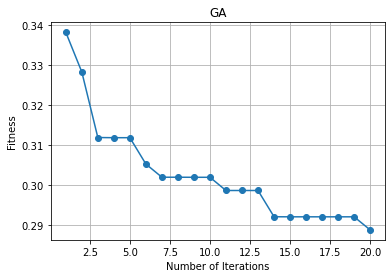

In [35]:
import numpy as np
from numpy.random import rand
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn.model_selection import train_test_split  
import matplotlib.pyplot as plt



# error rate
def error_rate(xtrain, ytrain, x, opts):
    # parameters
    k     = opts['k']
    fold  = opts['fold']
    xt    = fold['xt']
    yt    = fold['yt']
    xv    = fold['xv']
    yv    = fold['yv']
    
    # Number of instances
    num_train = np.size(xt, 0)
    num_valid = np.size(xv, 0)
    # Define selected features
    xtrain  = xt[:, x == 1]
    ytrain  = yt.reshape(num_train)  # Solve bug
    xvalid  = xv[:, x == 1]
    yvalid  = yv.reshape(num_valid)  # Solve bug   
    # Training
    mdl     = KNeighborsClassifier(n_neighbors = k)
    mdl.fit(xtrain, ytrain)
    # Prediction
    ypred   = mdl.predict(xvalid)
    acc     = np.sum(yvalid == ypred) / num_valid
    error   = 1 - acc
    
    return error


# Error rate & Feature size
def Fun(xtrain, ytrain, x, opts):
    # Parameters
    alpha    = 0.99
    beta     = 1 - alpha
    # Original feature size
    max_feat = len(x)
    # Number of selected features
    num_feat = np.sum(x == 1)
    # Solve if no feature selected
    if num_feat == 0:
        cost  = 1
    else:
        # Get error rate
        error = error_rate(xtrain, ytrain, x, opts)
        # Objective function
        cost  = alpha * error + beta * (num_feat / max_feat)
        
    return cost


def init_position(lb, ub, N, dim):
    X = np.zeros([N, dim], dtype='float')
    for i in range(N):
        for d in range(dim):
            X[i,d] = lb[0,d] + (ub[0,d] - lb[0,d]) * rand()        
    
    return X


def binary_conversion(X, thres, N, dim):
    Xbin = np.zeros([N, dim], dtype='int')
    for i in range(N):
        for d in range(dim):
            if X[i,d] > thres:
                Xbin[i,d] = 1
            else:
                Xbin[i,d] = 0
    
    return Xbin


def roulette_wheel(prob):
    num = len(prob)
    C   = np.cumsum(prob)
    P   = rand()
    for i in range(num):
        if C[i] > P:
            index = i;
            break
    
    return index


def jfs(xtrain, ytrain, opts):
    # Parameters
    ub       = 1
    lb       = 0
    thres    = 0.5    
    CR       = 0.8     # crossover rate
    MR       = 0.01    # mutation rate
    
    N        = opts['N']
    max_iter = opts['T']
    if 'CR' in opts:
        CR   = opts['CR'] 
    if 'MR' in opts: 
        MR   = opts['MR']  
 
     # Dimension
    dim = np.size(xtrain, 1)
    if np.size(lb) == 1:
        ub = ub * np.ones([1, dim], dtype='float')
        lb = lb * np.ones([1, dim], dtype='float')
        
    # Initialize position 
    X     = init_position(lb, ub, N, dim)
    
    # Binary conversion
    X     = binary_conversion(X, thres, N, dim)
    
    # Fitness at first iteration
    fit   = np.zeros([N, 1], dtype='float')
    Xgb   = np.zeros([1, dim], dtype='int')
    fitG  = float('inf')
    
    for i in range(N):
        fit[i,0] = Fun(xtrain, ytrain, X[i,:], opts)
        if fit[i,0] < fitG:
            Xgb[0,:] = X[i,:]
            fitG     = fit[i,0]
    
    # Pre
    curve = np.zeros([1, max_iter], dtype='float')
    t     = 0
    
    curve[0,t] = fitG.copy()
    print("Generation:", t + 1)
    print("Best (GA):", curve[0,t])
    t += 1
    
    while t < max_iter:
        # Probability
        inv_fit = 1 / (1 + fit)
        prob    = inv_fit / np.sum(inv_fit) 
 
        # Number of crossovers
        Nc = 0
        for i in range(N):
            if rand() < CR:
                Nc += 1
              
        x1 = np.zeros([Nc, dim], dtype='int')
        x2 = np.zeros([Nc, dim], dtype='int')
        for i in range(Nc):
            # Parent selection
            k1      = roulette_wheel(prob)
            k2      = roulette_wheel(prob)
            P1      = X[k1,:].copy()
            P2      = X[k2,:].copy()
            # Random one dimension from 1 to dim
            index   = np.random.randint(low = 1, high = dim-1)
            # Crossover
            x1[i,:] = np.concatenate((P1[0:index] , P2[index:]))
            x2[i,:] = np.concatenate((P2[0:index] , P1[index:]))
            # Mutation
            for d in range(dim):
                if rand() < MR:
                    x1[i,d] = 1 - x1[i,d]
                    
                if rand() < MR:
                    x2[i,d] = 1 - x2[i,d]

        
        # Merge two group into one
        Xnew = np.concatenate((x1 , x2), axis=0)
        
        # Fitness
        Fnew = np.zeros([2 * Nc, 1], dtype='float')
        for i in range(2 * Nc):
            Fnew[i,0] = Fun(xtrain, ytrain, Xnew[i,:], opts)
            if Fnew[i,0] < fitG:
                Xgb[0,:] = Xnew[i,:]
                fitG     = Fnew[i,0]
                   
        # Store result
        curve[0,t] = fitG.copy()
        print("Generation:", t + 1)
        print("Best (GA):", curve[0,t])
        t += 1
        
        # Elitism 
        XX  = np.concatenate((X , Xnew), axis=0)
        FF  = np.concatenate((fit , Fnew), axis=0)
        # Sort in ascending order
        ind = np.argsort(FF, axis=0)
        for i in range(N):
            X[i,:]   = XX[ind[i,0],:]
            fit[i,0] = FF[ind[i,0]]
       
            
    # Best feature subset
    Gbin       = Xgb[0,:]
    Gbin       = Gbin.reshape(dim)
    pos        = np.asarray(range(0, dim))    
    sel_index  = pos[Gbin == 1]
    num_feat   = len(sel_index)
    # Create dictionary
    ga_data = {'sf': sel_index, 'c': curve, 'nf': num_feat}
    
    return ga_data 



# load data
data  = df2
data  = data.values
feat  = np.asarray(data[:, 0:-1])
label = np.asarray(data[:, -1])

# split data into train & validation (70 -- 30)
xtrain, xtest, ytrain, ytest = train_test_split(feat, label, test_size=0.3, stratify=label)
fold = {'xt':xtrain, 'yt':ytrain, 'xv':xtest, 'yv':ytest}

# parameter
k    = 5     # k-value in KNN
N    = 10    # number of chromosomes
T    = 20   # maximum number of generations
CR   = 0.8
MR   = 0.01
opts = {'k':k, 'fold':fold, 'N':N, 'T':T, 'CR':CR, 'MR':MR}

# perform feature selection
fmdl = jfs(feat, label, opts)
sf   = fmdl['sf']

# model with selected features
num_train = np.size(xtrain, 0)
num_valid = np.size(xtest, 0)
x_train   = xtrain[:, sf]
y_train   = ytrain.reshape(num_train)  # Solve bug
x_valid   = xtest[:, sf]
y_valid   = ytest.reshape(num_valid)  # Solve bug

mdl       = KNeighborsClassifier(n_neighbors = k) 
mdl.fit(x_train, y_train)

# accuracy
y_pred    = mdl.predict(x_valid)
Acc       = np.sum(y_valid == y_pred)  / num_valid
GA_acc = "Accuracy:", 100 * Acc
print(*GA_acc)

# number of selected features
num_feat = fmdl['nf']
print("Feature Size:", num_feat)

# plot convergence
curve   = fmdl['c']
curve   = curve.reshape(np.size(curve,1))
x       = np.arange(0, opts['T'], 1.0) + 1.0

fig, ax = plt.subplots()
ax.plot(x, curve, 'o-')
ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Fitness')
ax.set_title('GA')
ax.grid()
plt.show()

## Precision, Recall and F1-Score of GA-KNN

In [36]:
from sklearn.metrics import precision_score
GA_prec = 'Precision: %.3f' % precision_score(ytest, y_pred, average='weighted')
print(GA_prec)
from sklearn.metrics import recall_score
GA_rec = 'Recall: %.3f' % recall_score(ytest, y_pred, average = 'weighted')
print(GA_rec)
from sklearn.metrics import f1_score
GA_f1 = 'F1 Score: %.3f' % f1_score(ytest, y_pred, average = 'weighted')
print(GA_f1)

Precision: 0.668
Recall: 0.713
F1 Score: 0.617


C:\Users\consu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## PSO with KNN

Iteration: 1
Best (PSO): 0.3415747590637907
Iteration: 2
Best (PSO): 0.3415747590637907
Iteration: 3
Best (PSO): 0.3250036255162919
Iteration: 4
Best (PSO): 0.3250036255162919
Iteration: 5
Best (PSO): 0.3250036255162919
Iteration: 6
Best (PSO): 0.3250036255162919
Iteration: 7
Best (PSO): 0.3250036255162919
Iteration: 8
Best (PSO): 0.3250036255162919
Iteration: 9
Best (PSO): 0.3250036255162919
Iteration: 10
Best (PSO): 0.3250036255162919
Iteration: 11
Best (PSO): 0.3249852684717761
Iteration: 12
Best (PSO): 0.3218413033501606
Iteration: 13
Best (PSO): 0.3218413033501606
Iteration: 14
Best (PSO): 0.3217311610830656
Iteration: 15
Best (PSO): 0.3217311610830656
Iteration: 16
Best (PSO): 0.3217311610830656
Iteration: 17
Best (PSO): 0.3217311610830656
Iteration: 18
Best (PSO): 0.3217311610830656
Iteration: 19
Best (PSO): 0.3217311610830656
Iteration: 20
Best (PSO): 0.3217311610830656
Accuracy: 68.0
Feature Size: 2149


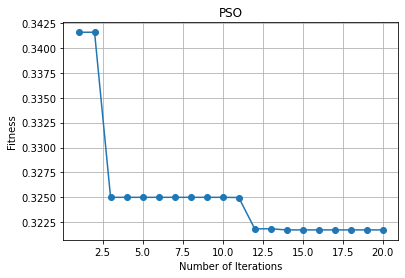

In [37]:
import numpy as np
from numpy.random import rand

# error rate
def error_rate(xtrain, ytrain, x, opts):
    # parameters
    k     = opts['k']
    fold  = opts['fold']
    xt    = fold['xt']
    yt    = fold['yt']
    xv    = fold['xv']
    yv    = fold['yv']
    
    # Number of instances
    num_train = np.size(xt, 0)
    num_valid = np.size(xv, 0)
    # Define selected features
    xtrain  = xt[:, x == 1]
    ytrain  = yt.reshape(num_train)  # Solve bug
    xvalid  = xv[:, x == 1]
    yvalid  = yv.reshape(num_valid)  # Solve bug   
    # Training
    mdl     = KNeighborsClassifier(n_neighbors = k)
    mdl.fit(xtrain, ytrain)
    # Prediction
    ypred   = mdl.predict(xvalid)
    acc     = np.sum(yvalid == ypred) / num_valid
    error   = 1 - acc
    
    return error


# Error rate & Feature size
def Fun(xtrain, ytrain, x, opts):
    # Parameters
    alpha    = 0.99
    beta     = 1 - alpha
    # Original feature size
    max_feat = len(x)
    # Number of selected features
    num_feat = np.sum(x == 1)
    # Solve if no feature selected
    if num_feat == 0:
        cost  = 1
    else:
        # Get error rate
        error = error_rate(xtrain, ytrain, x, opts)
        # Objective function
        cost  = alpha * error + beta * (num_feat / max_feat)
        
    return cost


def init_position(lb, ub, N, dim):
    X = np.zeros([N, dim], dtype='float')
    for i in range(N):
        for d in range(dim):
            X[i,d] = lb[0,d] + (ub[0,d] - lb[0,d]) * rand()        
    
    return X


def init_velocity(lb, ub, N, dim):
    V    = np.zeros([N, dim], dtype='float')
    Vmax = np.zeros([1, dim], dtype='float')
    Vmin = np.zeros([1, dim], dtype='float')
    # Maximum & minimum velocity
    for d in range(dim):
        Vmax[0,d] = (ub[0,d] - lb[0,d]) / 2
        Vmin[0,d] = -Vmax[0,d]
        
    for i in range(N):
        for d in range(dim):
            V[i,d] = Vmin[0,d] + (Vmax[0,d] - Vmin[0,d]) * rand()
        
    return V, Vmax, Vmin


def binary_conversion(X, thres, N, dim):
    Xbin = np.zeros([N, dim], dtype='int')
    for i in range(N):
        for d in range(dim):
            if X[i,d] > thres:
                Xbin[i,d] = 1
            else:
                Xbin[i,d] = 0
    
    return Xbin


def boundary(x, lb, ub):
    if x < lb:
        x = lb
    if x > ub:
        x = ub
    
    return x
    

def jfs(xtrain, ytrain, opts):
    # Parameters
    ub    = 1
    lb    = 0
    thres = 0.5
    w     = 0.9    # inertia weight
    c1    = 2      # acceleration factor
    c2    = 2      # acceleration factor
    
    N        = opts['N']
    max_iter = opts['T']
    if 'w' in opts:
        w    = opts['w']
    if 'c1' in opts:
        c1   = opts['c1']
    if 'c2' in opts:
        c2   = opts['c2'] 
    
    # Dimension
    dim = np.size(xtrain, 1)
    if np.size(lb) == 1:
        ub = ub * np.ones([1, dim], dtype='float')
        lb = lb * np.ones([1, dim], dtype='float')
        
    # Initialize position & velocity
    X             = init_position(lb, ub, N, dim)
    V, Vmax, Vmin = init_velocity(lb, ub, N, dim) 
    
    # Pre
    fit   = np.zeros([N, 1], dtype='float')
    Xgb   = np.zeros([1, dim], dtype='float')
    fitG  = float('inf')
    Xpb   = np.zeros([N, dim], dtype='float')
    fitP  = float('inf') * np.ones([N, 1], dtype='float')
    curve = np.zeros([1, max_iter], dtype='float') 
    t     = 0
    
    while t < max_iter:
        # Binary conversion
        Xbin = binary_conversion(X, thres, N, dim)
        
        # Fitness
        for i in range(N):
            fit[i,0] = Fun(xtrain, ytrain, Xbin[i,:], opts)
            if fit[i,0] < fitP[i,0]:
                Xpb[i,:]  = X[i,:]
                fitP[i,0] = fit[i,0]
            if fitP[i,0] < fitG:
                Xgb[0,:]  = Xpb[i,:]
                fitG      = fitP[i,0]
        
        # Store result
        curve[0,t] = fitG.copy()
        print("Iteration:", t + 1)
        print("Best (PSO):", curve[0,t])
        t += 1
        
        for i in range(N):
            for d in range(dim):
                # Update velocity
                r1     = rand()
                r2     = rand()
                V[i,d] = w * V[i,d] + c1 * r1 * (Xpb[i,d] - X[i,d]) + c2 * r2 * (Xgb[0,d] - X[i,d]) 
                # Boundary
                V[i,d] = boundary(V[i,d], Vmin[0,d], Vmax[0,d])
                # Update position
                X[i,d] = X[i,d] + V[i,d]
                # Boundary
                X[i,d] = boundary(X[i,d], lb[0,d], ub[0,d])
    
                
    # Best feature subset
    Gbin       = binary_conversion(Xgb, thres, 1, dim) 
    Gbin       = Gbin.reshape(dim)
    pos        = np.asarray(range(0, dim))    
    sel_index  = pos[Gbin == 1]
    num_feat   = len(sel_index)
    # Create dictionary
    pso_data = {'sf': sel_index, 'c': curve, 'nf': num_feat}
    
    return pso_data    


import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
 
import matplotlib.pyplot as plt


# load data
data  = df2
data  = data.values
feat  = np.asarray(data[:, 0:-1])   # feature vector
label = np.asarray(data[:, -1])     # label vector

# split data into train & validation (70 -- 30)
xtrain, xtest, ytrain, ytest = train_test_split(feat, label, test_size=0.3, stratify=label)
fold = {'xt':xtrain, 'yt':ytrain, 'xv':xtest, 'yv':ytest}

# parameter
k    = 5     # k-value in KNN
N    = 10    # number of particles
T    = 20   # maximum number of iterations
w    = 0.9
c1   = 2
c2   = 2
opts = {'k':k, 'fold':fold, 'N':N, 'T':T, 'w':w, 'c1':c1, 'c2':c2}

# perform feature selection
fmdl = jfs(feat, label, opts)
sf   = fmdl['sf']

# model with selected features
num_train = np.size(xtrain, 0)
num_valid = np.size(xtest, 0)
x_train   = xtrain[:, sf]
y_train   = ytrain.reshape(num_train)  # Solve bug
x_valid   = xtest[:, sf]
y_valid   = ytest.reshape(num_valid)  # Solve bug

mdl       = KNeighborsClassifier(n_neighbors = k) 
mdl.fit(x_train, y_train)

# accuracy
y_pred    = mdl.predict(x_valid)
Acc       = np.sum(y_valid == y_pred)  / num_valid
PSO_acc = "Accuracy:", 100 * Acc
print(*PSO_acc)

# number of selected features
num_feat = fmdl['nf']
print("Feature Size:", num_feat)

# plot convergence
curve   = fmdl['c']
curve   = curve.reshape(np.size(curve,1))
x       = np.arange(0, opts['T'], 1.0) + 1.0

fig, ax = plt.subplots()
ax.plot(x, curve, 'o-')
ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Fitness')
ax.set_title('PSO')
ax.grid()
plt.show()

## Precision, Recall and F1-Score of PSO-KNN

In [38]:
from sklearn.metrics import precision_score
PSO_prec = 'Precision: %.3f' % precision_score(ytest, y_pred, average='weighted')
print(PSO_prec)
from sklearn.metrics import recall_score
PSO_rec = 'Recall: %.3f' % recall_score(ytest, y_pred, average = 'weighted')
print(PSO_prec)
from sklearn.metrics import f1_score
PSO_f1 = 'F1 Score: %.3f' % f1_score(ytest, y_pred, average = 'weighted')
print(PSO_f1)

Precision: 0.506
Precision: 0.506
F1 Score: 0.574


C:\Users\consu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Only KNN

In [39]:
knn5 = KNeighborsClassifier(n_neighbors = 5)
knn5.fit(xtrain, ytrain)
y_pred_5 = knn5.predict(xtest)
from sklearn.metrics import accuracy_score
KNN_acc = "Accuracy: ", accuracy_score(ytest, y_pred_5)*100
print(*KNN_acc)

Accuracy:  60.0


## Precision, Recall and F1-Score of Only KNN

In [40]:
from sklearn.metrics import precision_score
KNN_prec = 'Precision: %.3f' % precision_score(ytest, y_pred_5, average='weighted')
print(KNN_prec)
from sklearn.metrics import recall_score
KNN_rec = 'Recall: %.3f' % recall_score(ytest, y_pred_5, average = 'weighted')
print(KNN_rec)
from sklearn.metrics import f1_score
KNN_f1 = 'F1 Score: %.3f' % f1_score(ytest, y_pred_5, average = 'weighted')
print(KNN_f1)

Precision: 0.515
Recall: 0.600
F1 Score: 0.540


In [41]:
from tabulate import tabulate
mydata = [["KNN", KNN_prec, KNN_rec, KNN_f1, KNN_acc],["PSO-KNN", PSO_prec, PSO_rec, PSO_f1, PSO_acc],["GA-KNN", GA_prec, GA_rec, GA_f1, GA_acc]]
# create header
head = ["Algorithm", "Precision_Score", "Recall_Score", "F1_Score", "Accuracy_Score"]
print(tabulate(mydata, headers=head, tablefmt="grid"))

+-------------+-------------------+----------------+-----------------+----------------------------------+
| Algorithm   | Precision_Score   | Recall_Score   | F1_Score        | Accuracy_Score                   |
+=============+===================+================+=================+==================================+
| KNN         | Precision: 0.515  | Recall: 0.600  | F1 Score: 0.540 | ('Accuracy: ', 60.0)             |
+-------------+-------------------+----------------+-----------------+----------------------------------+
| PSO-KNN     | Precision: 0.506  | Recall: 0.680  | F1 Score: 0.574 | ('Accuracy:', 68.0)              |
+-------------+-------------------+----------------+-----------------+----------------------------------+
| GA-KNN      | Precision: 0.668  | Recall: 0.713  | F1 Score: 0.617 | ('Accuracy:', 71.33333333333334) |
+-------------+-------------------+----------------+-----------------+----------------------------------+
